# Decision Tree

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

In [139]:
#Read the data
data = pd.read_csv("/home/root1/Downloads/zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [140]:
#Print the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [141]:
#Drop the names column
data.drop(data.columns[0], axis = 1, inplace = True)

In [142]:
#Print the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [172]:
#Assign target and independent variables
cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X=data.values[:,cols]
y=data.values[:,16]


In [173]:
#Split data to Train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,train_size = 0.6 ) 


In [174]:
#Build decision tree classifier
cls = DecisionTreeClassifier()

#Train the classifier
cls = cls.fit(X_train,y_train)

#Test the classifier
y_pred = cls.predict(X_test)

In [175]:
#Print cofusion matrix
print("Confusion Matrix: ", 
      confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[17  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [176]:
#Print Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975609756097561


In [177]:
#Print Report
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         9
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.98        41
   macro avg       0.96      0.93      0.93        41
weighted avg       0.98      0.98      0.97        41



[Text(273.92727272727274, 203.85, 'X[3] <= 0.5\ngini = 0.762\nsamples = 60\nvalue = [24, 11, 3, 8, 1, 6, 7]'),
 Text(243.4909090909091, 176.67000000000002, 'X[1] <= 0.5\ngini = 0.784\nsamples = 36\nvalue = [0, 11, 3, 8, 1, 6, 7]'),
 Text(213.05454545454546, 149.49, 'X[11] <= 0.5\ngini = 0.746\nsamples = 25\nvalue = [0, 0, 3, 8, 1, 6, 7]'),
 Text(182.61818181818182, 122.31, 'X[8] <= 0.5\ngini = 0.671\nsamples = 17\nvalue = [0, 0, 3, 0, 1, 6, 7]'),
 Text(121.74545454545455, 95.13, 'X[4] <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 6, 7]'),
 Text(91.30909090909091, 67.94999999999999, 'X[6] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 2, 7]'),
 Text(60.872727272727275, 40.77000000000001, 'X[12] <= 3.0\ngini = 0.5\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 2, 2]'),
 Text(30.436363636363637, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]'),
 Text(91.30909090909091, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]

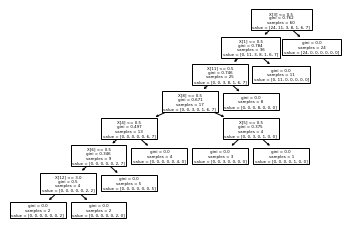

In [178]:
tree.plot_tree(cls)

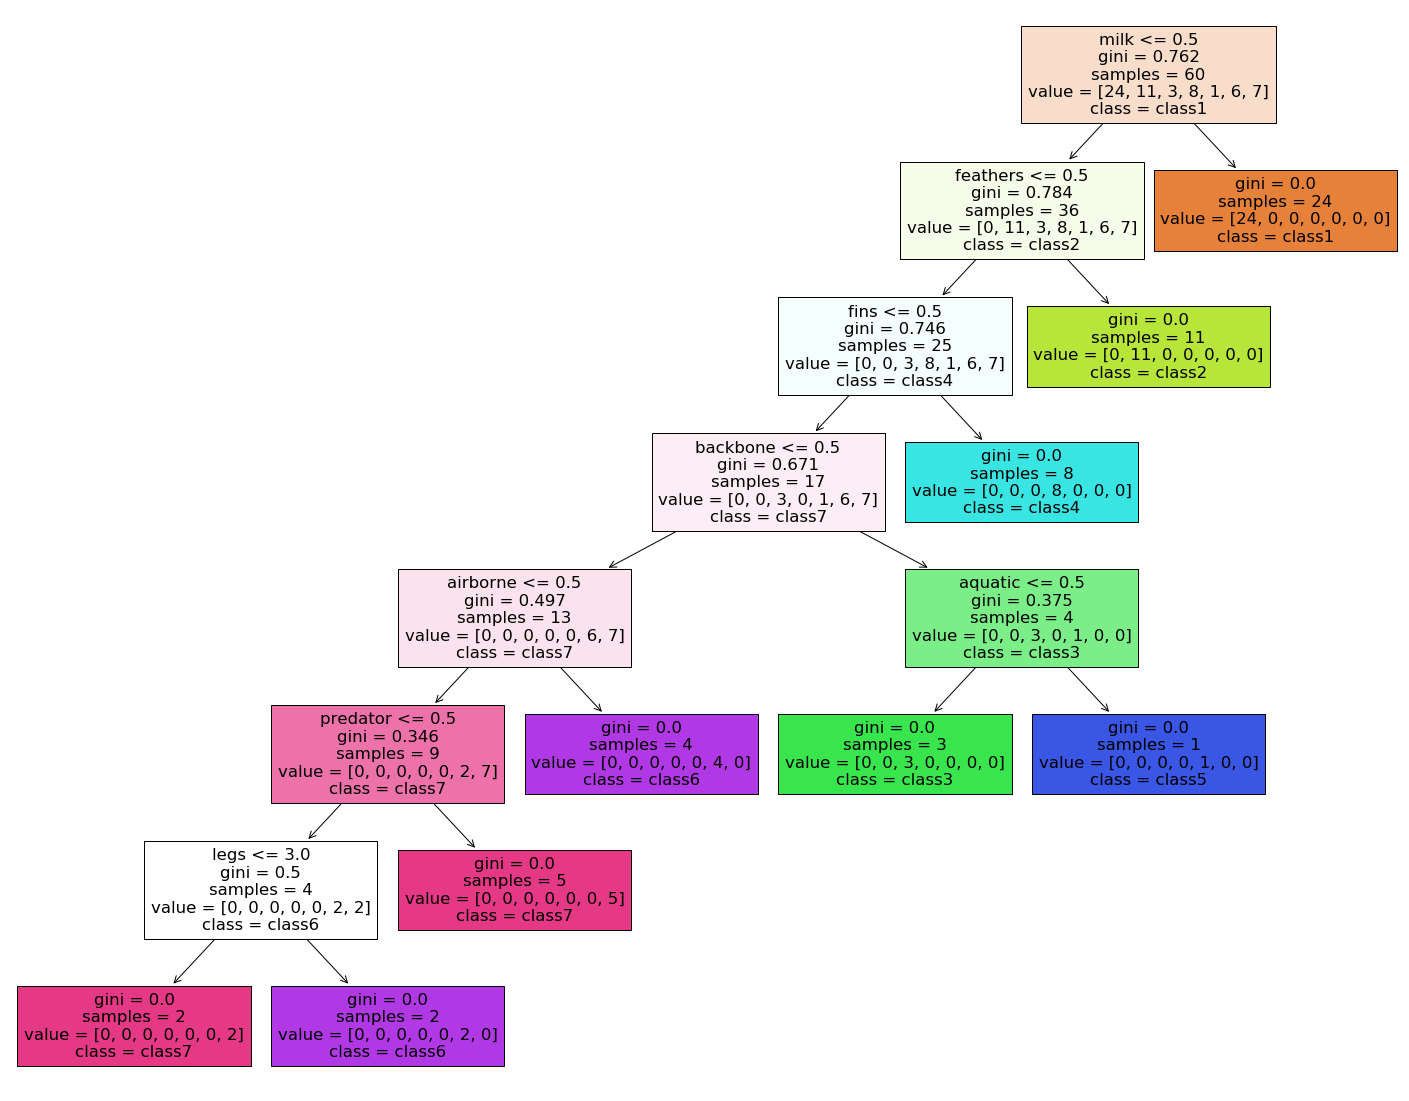

In [179]:

fn = ["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize"
]
cn = ["class1","class2","class3","class4","class5","class6","class7"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)